# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

import pickle

# loading ploting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline


import folium 
import plotly.express as px

# python core library for machine learning and data science
from sklearn import metrics
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

import time
import datetime
from datetime import datetime
import calendar

from string import punctuation

from xgboost import XGBRegressor
from xgboost import plot_importance

import itertools
import warnings






# Time Series for Emissions

In [ ]:
Emisiones_final  = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/Emissions_Totals_E_All_Data_(Normalized).csv",sep=",", encoding = "ISO-8859-1", index_col = 0)

In [ ]:
Emisiones_final.info()

In [ ]:
Emisiones_final["Year"].unique()

In [ ]:
Emisiones_final = Emisiones_final[Emisiones_final["Year"] >1989]

In [ ]:
Emisiones_final["Year"].unique()

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2030., 2050.])

In [ ]:
Emisiones_final["Item"].unique()

array(['Enteric Fermentation', 'Manure Management', 'Rice Cultivation',
       'Synthetic Fertilizers', 'Manure applied to Soils',
       'Manure left on Pasture', 'Crop Residues',
       'Burning - Crop residues', 'Net Forest conversion', 'Forestland',
       'Savanna fires', 'Fires in humid tropical forests', 'Forest fires',
       'Fires in organic soils', 'On-farm energy use', 'IPCC Agriculture',
       'Agricultural Soils', 'LULUCF', 'AFOLU',
       'Emissions on agricultural land', 'Farm-gate emissions',
       'Land Use change', 'Drained organic soils',
       'Drained organic soils (CO2)', 'Drained organic soils (N2O)'],
      dtype=object)

In [ ]:
Emisiones_final["Unit"].unique()

array(['kilotonnes'], dtype=object)

In [ ]:
Emisiones_final["Element"].unique()

array(['Emissions (CH4)', 'Emissions (CO2eq) from CH4 (AR5)',
       'Emissions (CO2eq) (AR5)', 'Emissions (N2O)',
       'Emissions (CO2eq) from N2O (AR5)', 'Direct emissions (N2O)',
       'Indirect emissions (N2O)', 'Emissions (CO2)'], dtype=object)

In [ ]:
Emisiones_final["Country"] = Emisiones_final["Area"]

In [ ]:
Emisiones_final = Emisiones_final[["Country", "Year","Item", "Element", "Value"]].reset_index(drop = True)

In [ ]:
Emisiones_final.head(1)

,Country,Year,Item,Element,Value
0,Afghanistan,1990.0,Enteric Fermentation,Emissions (CH4),178.4682


In [ ]:
Emisiones_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819932 entries, 0 to 819931
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  819932 non-null  object 
 1   Year     819932 non-null  float64
 2   Item     819932 non-null  object 
 3   Element  819932 non-null  object 
 4   Value    819931 non-null  float64
dtypes: float64(2), object(3)
memory usage: 31.3+ MB


# Dataset cleansing

In [ ]:
EmisionesST = Emisiones_final[Emisiones_final["Element"] == "Emissions (CO2eq) (AR5)"].reset_index(drop = True)

In [ ]:
EmisionesST =  EmisionesST[(EmisionesST["Item"] == "Farm-gate emissions") | (EmisionesST["Item"] == "Land Use change") ].reset_index(drop = True)

In [ ]:
EmisionesST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  14004 non-null  object 
 1   Year     14004 non-null  float64
 2   Item     14004 non-null  object 
 3   Element  14004 non-null  object 
 4   Value    14004 non-null  float64
dtypes: float64(2), object(3)
memory usage: 547.2+ KB


In [ ]:
EmisionesST["Country"].nunique()

239

In [ ]:
EmisionesST = EmisionesST[EmisionesST["Value"] > 0].reset_index(drop = True)

In [ ]:
EmisionesST.head()

,Country,Year,Item,Element,Value
0,Afghanistan,1990.0,Farm-gate emissions,Emissions (CO2eq) (AR5),8717.1955
1,Afghanistan,1991.0,Farm-gate emissions,Emissions (CO2eq) (AR5),9005.2263
2,Afghanistan,1992.0,Farm-gate emissions,Emissions (CO2eq) (AR5),8857.3738
3,Afghanistan,1993.0,Farm-gate emissions,Emissions (CO2eq) (AR5),8922.8730
4,Afghanistan,1994.0,Farm-gate emissions,Emissions (CO2eq) (AR5),8995.5635


In [ ]:
EmisionesST["Element"].unique()

array(['Emissions (CO2eq) (AR5)'], dtype=object)

In [ ]:
EmisionesST.groupby(["Country", "Year"]).agg(
    total_emissions = ("Value", "sum")
)

total_emissions
Country        Year                   
Afghanistan    1990.0        8717.1955
               1991.0        9005.2263
               1992.0        8857.3738
               1993.0        8922.8730
               1994.0        8995.5635
...                                ...
Western Sahara 2017.0           0.2043
               2018.0           0.2065
               2019.0           0.2089
               2030.0           0.2673
               2050.0           0.3315

[7059 rows x 1 columns]

In [ ]:
EmisionesST = EmisionesST.groupby(["Country", "Year"]).agg(
    total_emissions = ("Value", "sum")
)

In [ ]:
EmisionesST.head()

total_emissions
Country     Year                   
Afghanistan 1990.0        8717.1955
            1991.0        9005.2263
            1992.0        8857.3738
            1993.0        8922.8730
            1994.0        8995.5635

In [ ]:
EmisionesST.reset_index(inplace = True)

In [ ]:
EmisionesST.head()

,Country,Year,total_emissions
0,Afghanistan,1990.0,8717.1955
1,Afghanistan,1991.0,9005.2263
2,Afghanistan,1992.0,8857.3738
3,Afghanistan,1993.0,8922.8730
4,Afghanistan,1994.0,8995.5635


In [ ]:
EmisionesST["Year"] = EmisionesST["Year"].astype(int)

In [ ]:
EmisionesST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          7059 non-null   object 
 1   Year             7059 non-null   int64  
 2   total_emissions  7059 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.6+ KB


In [ ]:
EmisionesST["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2030, 2050])

In [ ]:
 EmisionesST = EmisionesST[EmisionesST["Year"] < 2020]

In [ ]:
EmisionesST = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/EmisionesST", index_col = 0)

In [ ]:
EmisionesST.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/EmisionesST")

# Generate new features from the merges with next datasets:

- Population.
- Production.
- GDP

## Population

In [ ]:
Poblacion_final= pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/Population_E_All_Data_(Normalized).csv",sep=",", encoding = "ISO-8859-1", index_col = 0)

In [ ]:
Poblacion_final.head(1)

,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
Area Code,,,,,,,,,,,
2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,7752.118,X,NaN


In [ ]:
Poblacion_final["Year"].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026,
       2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037,
       2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059,
       2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070,
       2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081,
       2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092,
       2093, 2094, 2095, 2096, 2097, 2098, 2099, 21

In [ ]:
Poblacion_final = Poblacion_final[Poblacion_final["Year"] >1989].reset_index(drop = True)

In [ ]:
Poblacion_final = Poblacion_final[Poblacion_final["Year"] < 2020].reset_index(drop = True)

In [ ]:
Poblacion_final["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
Poblacion_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37748 entries, 0 to 37747
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          37748 non-null  object 
 1   Item Code     37748 non-null  int64  
 2   Item          37748 non-null  object 
 3   Element Code  37748 non-null  int64  
 4   Element       37748 non-null  object 
 5   Year Code     37748 non-null  int64  
 6   Year          37748 non-null  int64  
 7   Unit          37748 non-null  object 
 8   Value         37748 non-null  float64
 9   Flag          37748 non-null  object 
 10  Note          0 non-null      float64
dtypes: float64(2), int64(4), object(5)
memory usage: 3.2+ MB


In [ ]:
Poblacion_final["Country"] = Poblacion_final["Area"]

In [ ]:
Poblacion_final["Population"] = Poblacion_final["Value"]

In [ ]:
Poblacion_final["Country"].nunique()

279

In [ ]:
EmisionesST["Country"].nunique()

233

In [ ]:
Poblacion_final.head()

,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note,Country,Population
0,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1990,1990,1000 persons,12412.308,X,NaN,Afghanistan,12412.308
1,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1991,1991,1000 persons,13299.017,X,NaN,Afghanistan,13299.017
2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1992,1992,1000 persons,14485.546,X,NaN,Afghanistan,14485.546
3,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1993,1993,1000 persons,15816.603,X,NaN,Afghanistan,15816.603
4,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1994,1994,1000 persons,17075.727,X,NaN,Afghanistan,17075.727


In [ ]:
Poblacion_final = Poblacion_final[["Country", "Year","Population"]]

In [ ]:
Poblacion_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37748 entries, 0 to 37747
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     37748 non-null  object 
 1   Year        37748 non-null  int64  
 2   Population  37748 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 884.8+ KB


In [ ]:
Poblacion_final.head()

,Country,Year,Population
0,Afghanistan,1990,12412.308
1,Afghanistan,1991,13299.017
2,Afghanistan,1992,14485.546
3,Afghanistan,1993,15816.603
4,Afghanistan,1994,17075.727


In [ ]:
EmisionesST.head()

,Country,Year,total_emissions
0,Afghanistan,1990,8717.1955
1,Afghanistan,1991,9005.2263
2,Afghanistan,1992,8857.3738
3,Afghanistan,1993,8922.8730
4,Afghanistan,1994,8995.5635


In [ ]:
EmisionesST_poblacion = EmisionesST.merge(Poblacion_final, how = "right", on = ["Country","Year"])

In [ ]:
EmisionesST_poblacion.head()

,Country,Year,total_emissions,Population
0,Afghanistan,1990,8717.1955,12412.308
1,Afghanistan,1991,9005.2263,13299.017
2,Afghanistan,1992,8857.3738,14485.546
3,Afghanistan,1993,8922.8730,15816.603
4,Afghanistan,1994,8995.5635,17075.727


In [ ]:
EmisionesST_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37748 entries, 0 to 37747
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          37748 non-null  object 
 1   Year             37748 non-null  int64  
 2   total_emissions  31335 non-null  float64
 3   Population       37748 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
EmisionesST_poblacion = EmisionesST_poblacion[["Country", "Year", "Population","total_emissions"]]

In [ ]:
EmisionesST_poblacion.head()

,Country,Year,Population,total_emissions
0,Afghanistan,1990,12412.308,8717.1955
1,Afghanistan,1991,13299.017,9005.2263
2,Afghanistan,1992,14485.546,8857.3738
3,Afghanistan,1993,15816.603,8922.8730
4,Afghanistan,1994,17075.727,8995.5635


In [ ]:
EmisionesST_poblacion.isnull().sum()

Country               0
Year                  0
Population            0
total_emissions    6413
dtype: int64

In [ ]:
EmisionesST_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37748 entries, 0 to 37747
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          37748 non-null  object 
 1   Year             37748 non-null  int64  
 2   Population       37748 non-null  float64
 3   total_emissions  31335 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
EmisionesST_poblacion[EmisionesST_poblacion["total_emissions"].isnull()]

,Country,Year,Population,total_emissions
3480,"Bonaire, Sint Eustatius and Saba",2011,21.993,NaN
3481,"Bonaire, Sint Eustatius and Saba",2012,22.842,NaN
3482,"Bonaire, Sint Eustatius and Saba",2013,23.505,NaN
3483,"Bonaire, Sint Eustatius and Saba",2014,24.070,NaN
3484,"Bonaire, Sint Eustatius and Saba",2015,24.570,NaN
...,...,...,...,...
37743,Net Food Importing Developing Countries,2015,566841.730,NaN
37744,Net Food Importing Developing Countries,2016,584963.723,NaN
37745,Net Food Importing Developing Countries,2017,603488.119,NaN
37746,Net Food Importing Developing Countries,2018,622474.988,NaN


In [ ]:
EmisionesST_poblacion.dropna(inplace = True)

In [ ]:
EmisionesST_poblacion[EmisionesST_poblacion["total_emissions"].isnull()]

,Country,Year,Population,total_emissions


In [ ]:
EmisionesST_poblacion.reset_index(drop = True, inplace = True)

In [ ]:
EmisionesST_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31335 entries, 0 to 31334
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          31335 non-null  object 
 1   Year             31335 non-null  int64  
 2   Population       31335 non-null  float64
 3   total_emissions  31335 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 979.3+ KB


In [ ]:
EmisionesST_poblacion.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/EmisionesST_poblacion.csv")

## Production

In [ ]:
Produccion_final = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/Production_Crops_Livestock_E_All_Data_(Normalized).csv",sep=",", encoding = "ISO-8859-1", index_col = 0)

In [ ]:
Produccion_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3811461 entries, 2 to 5817
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area          object 
 1   Item Code     int64  
 2   Item          object 
 3   Element Code  int64  
 4   Element       object 
 5   Year Code     int64  
 6   Year          int64  
 7   Unit          object 
 8   Value         float64
 9   Flag          object 
dtypes: float64(1), int64(4), object(5)
memory usage: 319.9+ MB


In [ ]:
Produccion_final.head()

,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Area Code,,,,,,,,,,
2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [ ]:
Produccion_final.isnull().sum()

Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           173168
Flag            739561
dtype: int64

In [ ]:
Produccion_final["Country"] = Produccion_final["Area"] 

In [ ]:
Produccion_final["Total Production"] = Produccion_final["Value"] 

In [ ]:
Produccion_final["Unit"].unique() 

array(['ha', 'hg/ha', 'tonnes', 'Head', '1000 Head', '100mg/An',
       '1000 No', 'hg/An', '0.1g/An', 'No', 'hg'], dtype=object)

In [ ]:
Produccion_final = Produccion_final[Produccion_final["Unit"] == "tonnes"]

In [ ]:
Produccion_final = Produccion_final[["Country", "Year", "Total Production"]]

In [ ]:
Produccion_final = Produccion_final[Produccion_final["Year"] >1989]

In [ ]:
Produccion_final["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
Produccion_final.reset_index(drop = True, inplace = True)

In [ ]:
Produccion_final.info()

In [ ]:
EmisionesST_poblacion.info()

In [ ]:
Produccion_final["Item"].nunique()

In [ ]:
EmisionesST_produccion = EmisionesST_poblacion.join(Produccion_final,lsuffix='_pob', rsuffix='_prod')

In [ ]:
EmisionesST_produccion.head()

In [ ]:
EmisionesST_produccion["Country"] = EmisionesST_produccion["Country_pob"]

In [ ]:
EmisionesST_produccion["Year"] = EmisionesST_produccion["Year_pob"]

In [ ]:
EmisionesST_produccion["Total Emissions"] = EmisionesST_produccion["total_emissions"]

In [ ]:
EmisionesST_produccion = EmisionesST_produccion[["Country", "Year", "Population", "Total Production", "Total Emissions"]]

In [ ]:
EmisionesST_produccion.head()

In [ ]:
EmisionesST_produccion.info()

In [ ]:
EmisionesST_produccion.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/EmisionesST_produccion.csv")

In [ ]:
EmisionesST_produccion = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/EmisionesST_produccion.csv", index_col = 0)

## GDP

In [ ]:
GDP = pd.read_csv ("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/GDP-1990.csv",sep=",", encoding = "ISO-8859-1")

In [ ]:
GDP.head(1)

,ï»¿Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,2,Afghanistan,6110,Value US$,22008,Gross Domestic Product,1990,1990,millions,3559.511736,X,International reliable sources,NaN


In [ ]:
GDP.isnull().sum()

In [ ]:
GDP["Country"] = GDP["Area"] 

In [ ]:
GDP["Element"].unique()

array(['Value US$', 'Value US$ per capita', 'Annual growth US$',
       'Annual growth US$ per capita'], dtype=object)

In [ ]:
GDP["Item"].unique()

In [ ]:
GDP["Unit"].unique()

array(['millions', 'US$', '%'], dtype=object)

In [ ]:
GDP = GDP[["Country", "Year", "Element", "Unit", "Value"]]

In [ ]:
GDP.isnull().sum()

In [ ]:
GDP.head()

In [ ]:
GDP.pivot_table(index = ["Country", "Year"],
                columns = "Element",
                values = "Value",
                fill_value = "0")

In [ ]:
GDP = GDP.pivot_table(index = ["Country", "Year"],
                columns = "Element",
                values = "Value",
                fill_value = "0").rename_axis(None, axis = 1).reset_index()

In [ ]:
GDP.head()

,Country,Year,Annual growth US$,Annual growth US$ per capita,Value US$,Value US$ per capita
0,Afghanistan,1990,11.529002,6.646081,3559.511736,286.772753
1,Afghanistan,1991,-4.406694,-10.780356,3402.654940,255.857628
2,Afghanistan,1992,1.23599,-7.056376,3444.711414,237.803353
3,Afghanistan,1993,-17.425807,-24.374895,2844.442641,179.839036
4,Afghanistan,1994,-39.701046,-44.147349,1715.169169,100.444869


In [ ]:
GDP.isnull().sum()

Country                         0
Year                            0
Annual growth US$               0
Annual growth US$ per capita    0
Value US$                       0
Value US$ per capita            0
dtype: int64

In [ ]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6305 entries, 0 to 6304
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       6305 non-null   object 
 1   Year                          6305 non-null   int64  
 2   Annual growth US$             6305 non-null   object 
 3   Annual growth US$ per capita  6305 non-null   object 
 4   Value US$                     6305 non-null   float64
 5   Value US$ per capita          6305 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 295.7+ KB


In [ ]:
GDP["Country"].replace("C?te d'Ivoire", "Cote d'Ivoire", inplace = True)

In [ ]:
GDP.isnull().sum()

In [ ]:
Emisiones_STfinal= EmisionesST_produccion.merge(GDP, how = "left", on = ["Country", "Year"])

In [ ]:
Emisiones_STfinal.info()

In [ ]:
Emisiones_STfinal.head()

In [ ]:
Emisiones_STfinal.isnull().sum()

In [ ]:
Emisiones_STfinal["GDP"] = Emisiones_STfinal["Value US$"]

In [ ]:
Emisiones_STfinal["GDP_per capita"] = Emisiones_STfinal["Value US$ per capita"]

In [ ]:
Emisiones_STfinal["GDP_annual_growth"] = Emisiones_STfinal["Annual growth US$"]

In [ ]:
Emisiones_STfinal["GDP_annual_growth_per capita"] = Emisiones_STfinal["Annual growth US$ per capita"]

In [ ]:
Emisiones_STfinal.drop(["Value US$", "Value US$ per capita", "Annual growth US$", "Annual growth US$ per capita"], axis = 1, inplace = True)

In [ ]:
Emisiones_STfinal.info()

In [ ]:
Emisiones_STfinal.head(1)

In [ ]:
Emisiones_STfinal.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/Emisiones_STfinal.csv")

In [ ]:
Emisiones_STfinal.head()

## Country Group

In [ ]:
Emisiones_STfinal = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/Emisiones_STfinal.csv", index_col =0)

In [ ]:
Country_Group = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/Regiones_filtradas_final.csv", index_col = 0 )

In [ ]:
Country_Group.head()

In [ ]:
Emisiones_STfinal.info()

In [ ]:
Emisiones_STfinal = Emisiones_STfinal.merge(Country_Group, how = "left", on = 'Country')

In [ ]:
Emisiones_STfinal.head()

In [ ]:
Emisiones_STfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65345 entries, 0 to 65344
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       65345 non-null  object 
 1   Year                          65345 non-null  int64  
 2   Population                    65345 non-null  float64
 3   Total Production              62306 non-null  float64
 4   Total Emissions               65345 non-null  float64
 5   GDP                           61608 non-null  float64
 6   GDP_per capita                61608 non-null  float64
 7   GDP_annual_growth             61608 non-null  float64
 8   GDP_annual_growth_per capita  61608 non-null  float64
 9   Country Group                 62230 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.5+ MB


In [ ]:
Emisiones_STfinal.isnull().sum()

In [ ]:
Emisiones_STfinal["Country Group"].dropna(axis = 0, inplace =True)

In [ ]:
Emisiones_STfinal.drop("Country Group", axis = 1, inplace = True)

In [ ]:
Emisiones_STfinal.info()

In [ ]:
Emisiones_STfinal.head()

In [ ]:
Emisiones_STfinal.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/Emisiones_STfinal.csv")

## New features



In [ ]:
df = Emisiones_STfinal

In [ ]:
df.head(1)

,Country,Year,Population,Total Production,Total Emissions,GDP,GDP_per capita,GDP_annual_growth,GDP_annual_growth_per capita
0,Afghanistan,1990,12412.308,9500.0,8717.1955,3559.511736,286.772753,11.529002,6.646081


In [ ]:
df["%_emissions"] = (df["Total Emissions"] / df["Total Emissions"].sum()) 

In [ ]:
df["emissions_per_capita"] = (df["Total Emissions"] / df["Population"])

In [ ]:
df["emissions_per_capita_mundial"] = (df["Total Emissions"] / df["Population"].sum())

In [ ]:
df["GDP_per_capita_mundial"] = (df["GDP"] / df["Population"].sum())

NameError: ignored

In [ ]:
df["emissions_per_GDP"] = (df["Total Emissions"] /df["GDP"])

In [ ]:
df["emissions_per_GDP_mundial"] = (df["Total Emissions"] / df["GDP"].sum())

In [ ]:
df["%_population"] = df["Population"] / df["Population"].sum()

In [ ]:
df["production_per_capita"] = df["Total Production"] / df["Population"]

In [ ]:
df["production_per_capita_mundial"] = df["Total Production"] / df["Population"].sum()

In [ ]:
df["emissions_per_production"] = df["Total Emissions"] / df["Total Production"]

In [ ]:
 
#df['pdt_chg']=df[1].pct_change()
#df[['YC','SC']]=df.sort_values(['year']).groupby('personcode')[['Height','Size']].pct_change()

df["emissions_annual_growth"] = df.sort_values(["Year"]).groupby('Country')["Total Emissions"].pct_change()

In [ ]:
df["population_annual_growth"] = df.sort_values(["Year"]).groupby('Country')["Population"].pct_change()

In [ ]:
df["production_annual_growth"] = df.sort_values(["Year"]).groupby('Country')["Total Production"].pct_change()

In [ ]:
df.head(1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65345 entries, 0 to 65344
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        65345 non-null  object        
 1   Year                           65345 non-null  datetime64[ns]
 2   Population                     65345 non-null  float64       
 3   Total Production               62306 non-null  float64       
 4   Total Emissions                65345 non-null  float64       
 5   GDP                            61608 non-null  float64       
 6   GDP_per capita                 61608 non-null  float64       
 7   GDP_annual_growth              61608 non-null  float64       
 8   GDP_annual_growth_per capita   61608 non-null  float64       
 9   %_emissions                    65345 non-null  float64       
 10  emissions_per_capita           65345 non-null  float64       
 11  emissions_per_c

In [ ]:
df["Year"] = pd.to_datetime(df["Year"], format = "%Y")


In [ ]:
df.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/df.csv")

# Plotting with px

### Scatter 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/df.csv", index_col = 0)

In [ ]:
df.info()

In [ ]:
scatter_continentes = df.merge(Country_Group, how = "left", on = 'Country')

In [ ]:
scatter_continentes.isnull().sum()

In [ ]:
scatter_continentes["Country Group"].dropna(axis = 0, inplace =True)

In [ ]:
df = scatter_continentes

In [ ]:
scatter_continentes = df[(df["Country Group"] == "Africa") |
                             (df["Country Group"] == "Asia") |
                             (df["Country Group"] == "Americas") |
                             (df["Country Group"] == "Europe") |
                             (df["Country Group"] == "Oceania") ].reset_index(drop = True)

In [ ]:
df = scatter_continentes

In [ ]:
df = dfhist.query ("Years == 2016")

In [ ]:
df.info()

In [ ]:
px.scatter(df, x = "GDP_per capita", y= "Total Emissions", size ="Population", size_max = 65, color = "Country Group", log_x = True, hover_name = "Country", height = 700 )

In [ ]:
px.scatter(df, x = "GDP_per capita", y= "total_emissions", size ="Population", size_max = 65, color = "Country Group", log_x = True, hover_name = "Country", hover_data = df.columns, height = 700 )

### Histogram

In [ ]:
dfhist = df.query('Year == 2010')

In [ ]:
px.histogram(dfhist, x ='Total Emissions', y = 'Population', marginal='rug', hover_name ='Country', color= 'Country Group',height =700)

### Line plot

In [ ]:
df.head()

,Country,Year,Population,Total Production,Total Emissions,GDP,GDP_per capita,GDP_annual_growth,GDP_annual_growth_per capita,%_emissions,...,emissions_per_GDP,emissions_per_GDP_mundial,%_population,production_per_capita,production_per_capita_mundial,emissions_per_production,emissions_annual_growth,population_annual_growth,production_annual_growth,Country Group
0,Afghanistan,1990-01-01,12412.308,9500.0,8717.1955,3559.511736,286.772753,11.529002,6.646081,0.000003,...,2.448986,5.250861e-07,0.000009,0.765369,0.000007,0.917600,NaN,NaN,NaN,Asia
1,Afghanistan,1990-01-01,12412.308,9500.0,8717.1955,3559.511736,286.772753,11.529002,6.646081,0.000003,...,2.448986,5.250861e-07,0.000009,0.765369,0.000007,0.917600,0.0,0.956353,8.500000,Asia
2,Afghanistan,1991-01-01,13299.017,9000.0,9005.2263,3402.654940,255.857628,-4.406694,-10.780356,0.000003,...,2.646529,5.424358e-07,0.000009,0.676742,0.000006,1.000581,0.0,0.000000,0.000000,Asia
3,Afghanistan,1991-01-01,13299.017,9000.0,9005.2263,3402.654940,255.857628,-4.406694,-10.780356,0.000003,...,2.646529,5.424358e-07,0.000009,0.676742,0.000006,1.000581,0.0,0.299939,-0.754822,Asia
4,Afghanistan,1992-01-01,14485.546,9900.0,8857.3738,3444.711414,237.803353,1.235990,-7.056376,0.000003,...,2.571296,5.335299e-07,0.000010,0.683440,0.000007,0.894684,0.0,1.062161,-0.424419,Asia


In [ ]:
px.line(data_frame = df, x = "Year" , y ="Total Emissions", line_group = "Country", color = "Country Group", range_y = (0, 1000000)
        )


# More cleansing

In [ ]:
df.info()

In [ ]:
df.drop('Country Group', axis = 1, inplace = True)

In [ ]:
df.head(10)

In [ ]:
df.drop_duplicates(keep = "first", inplace = True)

In [ ]:
df.drop_duplicates(subset=['Country', 'Year'], keep='last', inplace = True)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/dfST.csv")




# Add Country Code

In [ ]:
CC = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/Population_E_All_Data_(Normalized).csv", sep=",", encoding = "ISO-8859-1",index_col = 0)

In [ ]:
CC.head()

In [ ]:
CC.reset_index(inplace = True)

In [ ]:
CC["Country Code"] = CC["Area Code"]

In [ ]:
CC["Country"] = CC["Area"]

In [ ]:
CC = CC[["Country", "Country Code"]]

In [ ]:
CC.drop_duplicates(keep = "first", inplace = True)

In [ ]:
CC.reset_index(drop = True, inplace = True)

In [ ]:
CC.head()

,Country,Country Code
0,Afghanistan,2
1,Albania,3
2,Algeria,4
3,American Samoa,5
4,Andorra,6


In [ ]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       279 non-null    object
 1   Country Code  279 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


In [ ]:
CC.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Country Code.csv")

In [ ]:
dfST = dfST.merge(CC, how = "left", on = "Country")

In [ ]:
dfST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 6588
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        6589 non-null   object 
 1   Year                           6589 non-null   object 
 2   Population                     6589 non-null   int64  
 3   Total Production               6589 non-null   int64  
 4   Total Emissions                6589 non-null   int64  
 5   GDP                            6589 non-null   int64  
 6   GDP_per capita                 6589 non-null   int64  
 7   GDP_annual_growth              6589 non-null   int64  
 8   GDP_annual_growth_per capita   6589 non-null   int64  
 9   %_emissions                    6589 non-null   int64  
 10  emissions_per_capita_mundial   6589 non-null   int64  
 11  GDP_per_capita_mundial         6589 non-null   int64  
 12  emissions_per_GDP              6589 non-null   i

In [ ]:
dfST.isnull().sum()

In [ ]:
dfST.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/dfST.csv")

In [ ]:
dfST = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/dfST.csv", index_col = 0)

# Imputer

In [ ]:
dfST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5905 entries, 0 to 5904
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        5905 non-null   object 
 1   Year                           5905 non-null   object 
 2   Population                     5905 non-null   int64  
 3   Total Production               5905 non-null   int64  
 4   Total Emissions                5905 non-null   int64  
 5   GDP                            5905 non-null   int64  
 6   GDP_per capita                 5905 non-null   int64  
 7   GDP_annual_growth              5905 non-null   int64  
 8   GDP_annual_growth_per capita   5905 non-null   int64  
 9   %_emissions                    5905 non-null   int64  
 10  emissions_per_capita_mundial   5905 non-null   int64  
 11  GDP_per_capita_mundial         5905 non-null   int64  
 12  emissions_per_GDP              5905 non-null   i

In [ ]:
dfST.isnull().sum()

In [ ]:
dfST.set_index(["Country","Year"], inplace = True)

In [ ]:
knn_imputer = KNNImputer()
df_imputed = knn_imputer.fit_transform(dfST)

In [ ]:
df_imputed = pd.DataFrame(df_imputed, index = dfST.index, columns = dfST.columns)

In [ ]:
dfST.dropna(inplace = True)

In [ ]:
dfST.isnull().sum()

In [ ]:
dfST.to_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/dfST.csv")

# New features (time related)

In [ ]:
dfST = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/dfST.csv", index_col = 0)

In [ ]:
dfST["Year"] = pd.to_datetime(dfST['Year'], format = "%Y-%m-%d")

In [ ]:
dfST["Year"] = dfST["Year"].dt.year

AttributeError: ignored

In [ ]:
dfST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5905 entries, 0 to 5904
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        5905 non-null   object 
 1   Year                           5905 non-null   int64  
 2   Population                     5905 non-null   int64  
 3   Total Production               5905 non-null   int64  
 4   Total Emissions                5905 non-null   int64  
 5   GDP                            5905 non-null   int64  
 6   GDP_per capita                 5905 non-null   int64  
 7   GDP_annual_growth              5905 non-null   int64  
 8   GDP_annual_growth_per capita   5905 non-null   int64  
 9   %_emissions                    5905 non-null   int64  
 10  emissions_per_capita_mundial   5905 non-null   int64  
 11  GDP_per_capita_mundial         5905 non-null   int64  
 12  emissions_per_GDP              5905 non-null   i

In [ ]:
dfST.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5905 entries, 0 to 5904
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        5905 non-null   object 
 1   Year                           5905 non-null   int64  
 2   Population                     5905 non-null   int64  
 3   Total Production               5905 non-null   int64  
 4   Total Emissions                5905 non-null   int64  
 5   GDP                            5905 non-null   int64  
 6   GDP_per capita                 5905 non-null   int64  
 7   GDP_annual_growth              5905 non-null   int64  
 8   GDP_annual_growth_per capita   5905 non-null   int64  
 9   %_emissions                    5905 non-null   int64  
 10  emissions_per_capita_mundial   5905 non-null   int64  
 11  GDP_per_capita_mundial         5905 non-null   int64  
 12  emissions_per_GDP              5905 non-null   i

## GROUP BY 1

In [ ]:

gb_list = ["Year" ,"Country", "production_per_capita"]

def add_new_vars(full_df, gb_list, target_column = "Total Production"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb1 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
gb1.drop("Country", axis = 1, inplace = True)



In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb1,
    on = ["Year", "production_per_capita"],
    how = "left"
)
print(dfST.shape)

(5905, 24)
(5907, 32)


## GROUP BY 2

In [ ]:
gb_list = ["Year" ,"Country", "Population"]

def add_new_vars(full_df, gb_list, target_column = "Population"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))
    gb_df_[feature_name + "_sum_shift_4"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(4))
    gb_df_[feature_name + "_sum_shift_5"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(5))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))
    gb_df_[feature_name + "_sum_var_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(3) - series.shift(4))
    gb_df_[feature_name + "_sum_var_4"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(4) - series.shift(5))

    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb2 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
gb2.drop("Country", axis = 1, inplace = True)



In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb2,
    on = ["Year", "Population"],
    how = "left"
)
print(dfST.shape)

(5907, 32)
(6449, 43)


## GROUP BY 3

In [ ]:
gb_list = ["Year" ,"Country", "GDP_per capita"]

def add_new_vars(full_df, gb_list, target_column = "GDP"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb3 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
gb3.drop("Country", axis = 1, inplace = True)



In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb3,
    on = ["Year", "GDP_per capita"],
    how = "left"
)
print(dfST.shape)

(6449, 43)
(6620, 51)


## GROUP BY 4

In [ ]:
gb_list = ["Year" , "Country", "emissions_per_capita"]

def add_new_vars(full_df, gb_list, target_column = "Total Emissions"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb4 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
gb4.drop("Country", axis = 1, inplace = True)



In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb4,
    on = ["Year", "emissions_per_capita"],
    how = "left"
)
print(dfST.shape)

(6620, 51)
(6686, 59)


## GROUP BY 5

In [ ]:
gb_list = ["Year", "Country","emissions_per_production"]

def add_new_vars(full_df, gb_list, target_column = "Total Production"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb5 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
gb5.drop("Country", axis = 1, inplace = True)



In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb5,
    on = ["Year", "emissions_per_production"],
    how = "left"
)
print(dfST.shape)

(6686, 59)
(6690, 67)


## GROUP BY 6

In [ ]:
gb_list = ["Year" , "emissions_per_capita"]

def add_new_vars(full_df, gb_list, target_column = "Total Production"):

    # genera el nombre de la futura variable
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb6 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb6,
    on = ["Year", "emissions_per_capita"],
    how = "left"
)
print(dfST.shape)

(6690, 67)
(6690, 75)


## GROUP BY 7



In [ ]:
gb_list = ["Year" ,"emissions_annual_growth"]

def add_new_vars(full_df, gb_list, target_column = "Total Emissions"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb7 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb7,
    on = ["Year", "emissions_annual_growth"],
    how = "left"
)
print(dfST.shape)

(6690, 75)
(6690, 83)


## GROUP BY 8

In [ ]:
gb_list = ["Year" , "emissions_annual_growth"]

def add_new_vars(full_df, gb_list, target_column = "GDP"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb8 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb8,
    on = ["Year", "emissions_annual_growth"],
    how = "left"
)
print(dfST.shape)

(6690, 83)
(6690, 91)


## GROUP BY 9

In [ ]:
gb_list = ["Year" , "GDP_annual_growth"]

def add_new_vars(full_df, gb_list, target_column = "Total Emissions"):

    # generates the name of the new feature
    feature_name = "_".join(gb_list + [target_column])
    
    # resample the dataframe according to the gb_list
    gb_df_ = dfST.groupby(gb_list)[target_column].sum().to_frame().reset_index()
    gb_df_.rename(columns = {target_column : feature_name + "_sum"}, inplace = True)
    
    # generate shifts, time variation and moving averages 
    gb_df_[feature_name + "_sum_shift_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(1))
    gb_df_[feature_name + "_sum_shift_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(2))
    gb_df_[feature_name + "_sum_shift_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(lambda series: series.shift(3))

    gb_df_[feature_name + "_sum_var_1"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1) - series.shift(2))
    gb_df_[feature_name + "_sum_var_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(2) - series.shift(3))

    gb_df_[feature_name + "_sum_ma_2"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(2).mean())
    gb_df_[feature_name + "_sum_ma_3"] = gb_df_.groupby(gb_list[1:])[feature_name + "_sum"].transform(
        lambda series: series.shift(1).rolling(3).mean())
    
    return gb_df_

gb9 = add_new_vars(full_df = dfST, gb_list = gb_list, target_column = "Total Emissions")

In [ ]:
print(dfST.shape)
dfST = pd.merge(
    left = dfST,
    right = gb9,
    on = ["Year", "GDP_annual_growth"],
    how = "left"
)
print(dfST.shape)

(6690, 91)
(6690, 99)


# Preparare dataset before training


In [ ]:
dfST.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 0 to 6689
Data columns (total 99 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Country                                                            6690 non-null   object 
 1   Year                                                               6690 non-null   int64  
 2   Population                                                         6690 non-null   int64  
 3   Total Production                                                   6690 non-null   int64  
 4   Total Emissions                                                    6690 non-null   int64  
 5   GDP                                                                6690 non-null   int64  
 6   GDP_per capita                                                     6690 non-null   int64  
 7   GDP_annual_growth       

In [ ]:
cols_to_drop = [


"Country",
"Population",
"Total Production",
"GDP",

"Year_Country_production_per_capita_Total Emissions_sum",
"Year_Country_GDP_per capita_Total Emissions_sum",
"Year_Country_emissions_per_capita_Total Emissions_sum",
"Year_Country_emissions_per_production_Total Emissions_sum",

"Year_emissions_per_capita_Total Emissions_sum",
"Year_emissions_annual_growth_Total Emissions_sum_x",
"Year_emissions_annual_growth_Total Emissions_sum_y",
"Year_GDP_annual_growth_Total Emissions_sum"




 


    
]

dfST.drop(cols_to_drop, inplace = True, axis = 1)

In [ ]:
dfST.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 0 to 6689
Data columns (total 87 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Year                                                               6690 non-null   int64  
 1   Total Emissions                                                    6690 non-null   int64  
 2   GDP_per capita                                                     6690 non-null   int64  
 3   GDP_annual_growth                                                  6690 non-null   int64  
 4   GDP_annual_growth_per capita                                       6690 non-null   int64  
 5   %_emissions                                                        6690 non-null   int64  
 6   emissions_per_capita_mundial                                       6690 non-null   int64  
 7   GDP_per_capita_mundial  

# Train, Validation and Test.

In [ ]:
# separate the dates for train, validation and test

train_index = sorted(list(dfST["Year"].unique()))[:-2]

valida_index = [sorted(list(dfST["Year"].unique()))[-2]]

test_index = [sorted(list(dfST["Year"].unique()))[-1]]

In [ ]:
train_index


[1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [ ]:
valida_index

[2018]

In [ ]:
test_index

[2019]

In [ ]:
# split the data into train, validation and test dataset

X_train = dfST[dfST["Year"].isin(train_index)].drop(['Total Emissions', "Year"], axis=1)
Y_train = dfST[dfST["Year"].isin(train_index)]['Total Emissions']

X_valida = dfST[dfST["Year"].isin(valida_index)].drop(['Total Emissions', "Year"], axis=1)
Y_valida = dfST[dfST["Year"].isin(valida_index)]['Total Emissions']

X_test = dfST[dfST["Year"].isin(test_index)].drop(['Total Emissions', "Year"], axis=1)
Y_test = dfST[dfST["Year"].isin(test_index)]['Total Emissions']

In [ ]:
X_train
X_train.shape


(6214, 85)

In [ ]:
Y_train
Y_train.shape

(6214,)

In [ ]:

X_valida
X_valida.shape

(240, 85)

In [ ]:

Y_valida
Y_valida.shape

(240,)

In [ ]:

X_test
X_test.shape

(236, 85)

In [ ]:

Y_test
Y_test.shape

(236,)

# Training

In [ ]:
st = time.time()

model = XGBRegressor(seed = 175)

model_name = str(model).split("(")[0]

day = str(datetime.now()).split()[0].replace("-", "_")
hour = str(datetime.now()).split()[1].replace(":", "_").split(".")[0]
t = str(day) + "_" + str(hour)

model.fit(X_train, Y_train, eval_metric = "rmse", 
    eval_set = [(X_train, Y_train), (X_valida, Y_valida)], 
    verbose = True,
    early_stopping_rounds = 20)

et = time.time()

print("Training took {} minutes!".format((et - st)/60))

[22:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:159990	validation_1-rmse:136537
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:144855	validation_1-rmse:124139
[2]	validation_0-rmse:131118	validation_1-rmse:112006
[3]	validation_0-rmse:118669	validation_1-rmse:101122
[4]	validation_0-rmse:107457	validation_1-rmse:91493.1
[5]	validation_0-rmse:97231	validation_1-rmse:82791.5
[6]	validation_0-rmse:88007	validation_1-rmse:74955.1
[7]	validation_0-rmse:79695.4	validation_1-rmse:67736.1
[8]	validation_0-rmse:72213.1	validation_1-rmse:61631.2
[9]	validation_0-rmse:65382.4	validation_1-rmse:55331
[10]	validation_0-rmse:59253	validation_1-rmse:50230.1
[11]	validation_0-rmse:53663.5	validation_1-rmse:44890.7
[12]	validation_0-rmse:48642.1	validation_1-rmse:40790.1


In [ ]:
print("{}_{}.dat".format(model_name, t))

XGBRegressor_2022_03_29_22_05_39.dat


In [ ]:
pickle.dump(model, open("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/{}_{}.pickle11".format(model_name, t), "wb"))

In [ ]:
model = pickle.load(open("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/SERIES TEMPORALES/{}_{}.pickle11".format(model_name, t), "rb"))

[22:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



# Feature importance

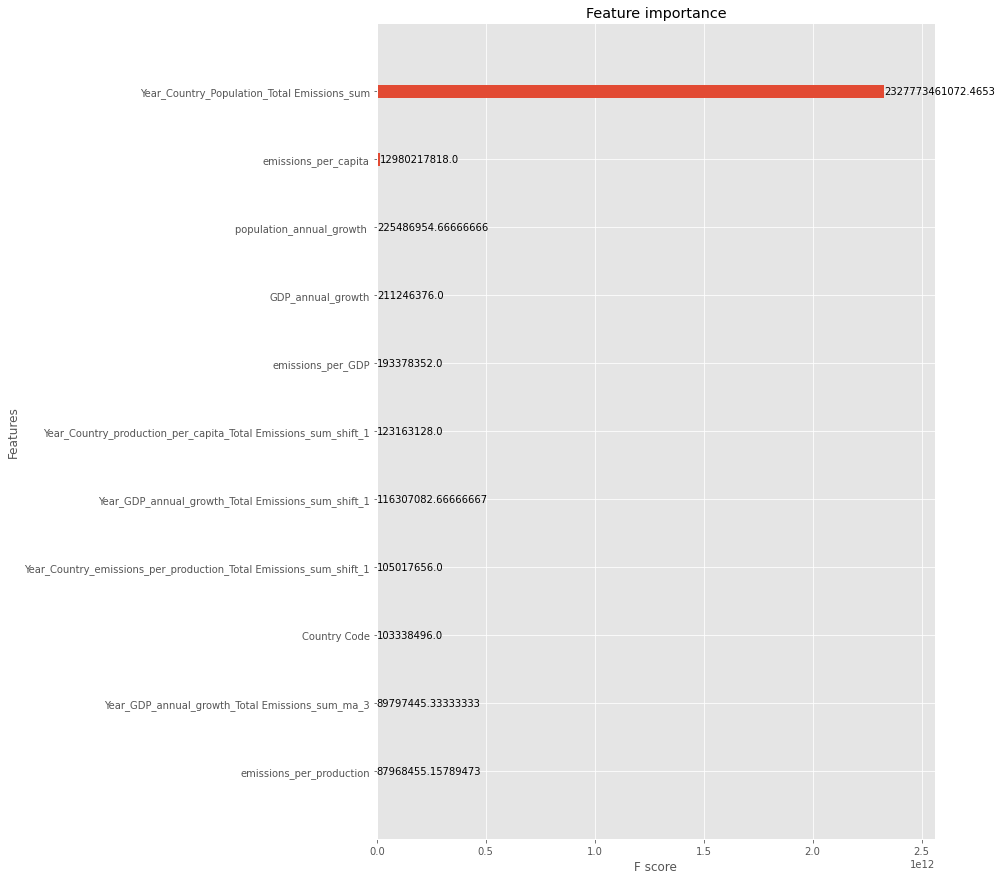

In [ ]:
importance = model.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (10, 15))
plot_importance(model, importance_type = "gain", ax = ax);


# Model prediction and evaluation of the model


## Prediction

In [ ]:
Y_valida_pred = model.predict(X_valida)

rmse_valida = sqrt(metrics.mean_squared_error(Y_valida, Y_valida_pred))
rmse_valida

4430.337609305778

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 27 to 6670
Data columns (total 85 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   GDP_per capita                                                     236 non-null    int64  
 1   GDP_annual_growth                                                  236 non-null    int64  
 2   GDP_annual_growth_per capita                                       236 non-null    int64  
 3   %_emissions                                                        236 non-null    int64  
 4   emissions_per_capita_mundial                                       236 non-null    int64  
 5   GDP_per_capita_mundial                                             236 non-null    int64  
 6   emissions_per_GDP                                                  236 non-null    int64  
 7   emissions_per_GDP_mundia

In [ ]:
if "Total Emissions_predicted" in X_test.columns:
    X_test.drop("Total Emissions_predicted", axis = 1, inplace = True)
    
Y_test_predict = model.predict(X_test)
X_test["Total Emissions_predicted"] = Y_test_predict


In [ ]:
X_test.head()

,GDP_per capita,GDP_annual_growth,GDP_annual_growth_per capita,%_emissions,emissions_per_capita_mundial,GDP_per_capita_mundial,emissions_per_GDP,emissions_per_GDP_mundial,%_population,production_per_capita_mundial,...,Year_emissions_annual_growth_Total Emissions_sum_ma_2_y,Year_emissions_annual_growth_Total Emissions_sum_ma_3_y,Year_GDP_annual_growth_Total Emissions_sum_shift_1,Year_GDP_annual_growth_Total Emissions_sum_shift_2,Year_GDP_annual_growth_Total Emissions_sum_shift_3,Year_GDP_annual_growth_Total Emissions_sum_var_1,Year_GDP_annual_growth_Total Emissions_sum_var_2,Year_GDP_annual_growth_Total Emissions_sum_ma_2,Year_GDP_annual_growth_Total Emissions_sum_ma_3,Total Emissions_predicted
27,469,0,-2,0,0,0,0,0,0,0,...,NaN,NaN,162286.0,110230.0,1637659.0,52056.0,-1527429.0,136258.0,636725.000000,16905.406250
55,5303,0,0,0,0,0,0,0,0,0,...,NaN,NaN,162286.0,110230.0,1637659.0,52056.0,-1527429.0,136258.0,636725.000000,3139.113770
83,3975,-2,-4,0,0,0,0,0,0,0,...,NaN,NaN,2352.0,40622.0,36872.0,-38270.0,3750.0,21487.0,26615.333333,14138.959961
134,1675,4,2,0,0,0,0,0,0,0,...,2598.0,2421.666667,743824.0,629402.0,455831.0,114422.0,173571.0,686613.0,609685.666667,424.199554
164,40887,-1,-2,0,0,0,0,0,0,0,...,2598.0,2421.666667,161448.0,309194.0,138795.0,-147746.0,170399.0,235321.0,203145.666667,424.199554


In [ ]:
X_test["Total Emissions_predicted"]

27      16905.406250
55       3139.113770
83      14138.959961
134       424.199554
164       424.199554
            ...     
6540    29711.308594
6567    39329.937500
6612      555.127319
6641    81030.750000
6670    78164.062500
Name: Total Emissions_predicted, Length: 236, dtype: float32

In [ ]:
X_test["Total Emissions_predicted"].isnull().sum()

0

## Validation

In [ ]:
test_predictions_valida = pd.DataFrame(model.predict(X_valida), columns = ['Prediction'], index = X_valida.index)

In [ ]:
test_predictions_valida

,Prediction
26,14411.880859
54,3702.176758
82,12572.766602
133,424.199554
163,424.199554
...,...
6539,29711.308594
6566,39329.937500
6611,555.127319
6640,81030.750000


In [ ]:
Valor_correcto_valida = pd.DataFrame(Y_valida, index = Y_valida.index)

In [ ]:
Valor_correcto_valida

,Total Emissions
26,15787
54,3567
82,13559
133,9
163,20
...,...
6539,28444
6566,37438
6611,524
6640,84093


In [ ]:
results_df_valida = Valor_correcto_valida.join(test_predictions_valida)

In [ ]:
results_df_valida 

,Total Emissions,Prediction
26,15787,14411.880859
54,3567,3702.176758
82,13559,12572.766602
133,9,424.199554
163,20,424.199554
...,...,...
6539,28444,29711.308594
6566,37438,39329.937500
6611,524,555.127319
6640,84093,81030.750000


In [ ]:
results_df_valida['Error'] = np.round(results_df_valida['Total Emissions'] - results_df_valida['Prediction'], 2)
results_df_valida['Variacion %'] = np.round(((results_df_valida['Error'] / results_df_valida['Total Emissions'])*100), 2)

In [ ]:
results_df_valida

,Total Emissions,Prediction,Error,Variacion %
26,15787,14411.880859,1375.12,8.71
54,3567,3702.176758,-135.18,-3.79
82,13559,12572.766602,986.23,7.27
133,9,424.199554,-415.20,-4613.33
163,20,424.199554,-404.20,-2021.00
...,...,...,...,...
6539,28444,29711.308594,-1267.31,-4.46
6566,37438,39329.937500,-1891.94,-5.05
6611,524,555.127319,-31.13,-5.94
6640,84093,81030.750000,3062.25,3.64


In [ ]:
results_df_valida['Country Code']= X_valida['Country Code']
results_df_valida

,Total Emissions,Prediction,Error,Variacion %,Country Code
26,15787,14411.880859,1375.12,8.71,2
54,3567,3702.176758,-135.18,-3.79,3
82,13559,12572.766602,986.23,7.27,4
133,9,424.199554,-415.20,-4613.33,5
163,20,424.199554,-404.20,-2021.00,6
...,...,...,...,...,...
6539,28444,29711.308594,-1267.31,-4.46,234
6566,37438,39329.937500,-1891.94,-5.05,235
6611,524,555.127319,-31.13,-5.94,155
6640,84093,81030.750000,3062.25,3.64,236


In [ ]:
results_df_valida

,Total Emissions,Prediction,Error,Variacion %,Country Code
26,15787,14411.880859,1375.12,8.71,2
54,3567,3702.176758,-135.18,-3.79,3
82,13559,12572.766602,986.23,7.27,4
133,9,424.199554,-415.20,-4613.33,5
163,20,424.199554,-404.20,-2021.00,6
...,...,...,...,...,...
6539,28444,29711.308594,-1267.31,-4.46,234
6566,37438,39329.937500,-1891.94,-5.05,235
6611,524,555.127319,-31.13,-5.94,155
6640,84093,81030.750000,3062.25,3.64,236


In [ ]:
results_df_valida['Squared_error'] = results_df_valida['Error'] ** 2

In [ ]:
results_df_valida ['Root_squared_error'] = np.sqrt(results_df_valida['Squared_error'])

In [ ]:
mse_valida = results_df_valida['Squared_error'].mean()
rmse_valida = results_df_valida['Root_squared_error'].mean()

In [ ]:
print(f'MSE: {np.round(mse_valida,3)}, RMSE: {np.round(rmse_valida,3)}')

MSE: 19627892.076, RMSE: 1126.367


In [ ]:
results_df_valida 

,Total Emissions,Prediction,Error,Variacion %,Country Code,Squared_error,Root_squared_error
26,15787,14411.880859,1375.12,8.71,2,1.890955e+06,1375.12
54,3567,3702.176758,-135.18,-3.79,3,1.827363e+04,135.18
82,13559,12572.766602,986.23,7.27,4,9.726496e+05,986.23
133,9,424.199554,-415.20,-4613.33,5,1.723910e+05,415.20
163,20,424.199554,-404.20,-2021.00,6,1.633776e+05,404.20
...,...,...,...,...,...,...,...
6539,28444,29711.308594,-1267.31,-4.46,234,1.606075e+06,1267.31
6566,37438,39329.937500,-1891.94,-5.05,235,3.579437e+06,1891.94
6611,524,555.127319,-31.13,-5.94,155,9.690769e+02,31.13
6640,84093,81030.750000,3062.25,3.64,236,9.377375e+06,3062.25


## Test

In [ ]:
test_predictions_test = pd.DataFrame(X_test, columns = ['Total Emissions_predicted'], index = X_test.index)

In [ ]:
test_predictions_test

,Total Emissions_predicted
27,16905.406250
55,3139.113770
83,14138.959961
134,424.199554
164,424.199554
...,...
6540,29711.308594
6567,39329.937500
6612,555.127319
6641,81030.750000


In [ ]:
Valor_correcto_test = pd.DataFrame(Y_test, index = Y_test.index)

In [ ]:
Valor_correcto_test 

,Total Emissions
27,16471
55,3404
83,13669
134,9
164,20
...,...
6540,28257
6567,38001
6612,527
6641,84683


In [ ]:
results_df_test = Valor_correcto_test.join(test_predictions_test)

In [ ]:
results_df_test 

,Total Emissions,Total Emissions_predicted
27,16471,16905.406250
55,3404,3139.113770
83,13669,14138.959961
134,9,424.199554
164,20,424.199554
...,...,...
6540,28257,29711.308594
6567,38001,39329.937500
6612,527,555.127319
6641,84683,81030.750000


In [ ]:
results_df_test ['Error'] = np.round(results_df_test ['Total Emissions'] - results_df_test ['Total Emissions_predicted'],2)
results_df_test ['Variacion %'] = np.round(((results_df_test ['Error'] / results_df_test ['Total Emissions'])*100),2)

In [ ]:
results_df_test 

,Total Emissions,Total Emissions_predicted,Error,Variacion %
27,16471,16905.406250,-434.41,-2.64
55,3404,3139.113770,264.89,7.78
83,13669,14138.959961,-469.96,-3.44
134,9,424.199554,-415.20,-4613.33
164,20,424.199554,-404.20,-2021.00
...,...,...,...,...
6540,28257,29711.308594,-1454.31,-5.15
6567,38001,39329.937500,-1328.94,-3.50
6612,527,555.127319,-28.13,-5.34
6641,84683,81030.750000,3652.25,4.31


In [ ]:
results_df_test['Country Code']= X_test['Country Code']
results_df_test

,Total Emissions,Total Emissions_predicted,Error,Variacion %,Country Code
27,16471,16905.406250,-434.41,-2.64,2
55,3404,3139.113770,264.89,7.78,3
83,13669,14138.959961,-469.96,-3.44,4
134,9,424.199554,-415.20,-4613.33,5
164,20,424.199554,-404.20,-2021.00,6
...,...,...,...,...,...
6540,28257,29711.308594,-1454.31,-5.15,234
6567,38001,39329.937500,-1328.94,-3.50,235
6612,527,555.127319,-28.13,-5.34,155
6641,84683,81030.750000,3652.25,4.31,236


In [ ]:
results_df_test ['Squared_error'] = np.round((results_df_test ['Error'] ** 2),2)

In [ ]:
results_df_test ['Root_squared_error'] = np.round(np.sqrt(results_df_test ['Squared_error']),2) 

In [ ]:
mse_test = results_df_test ['Squared_error'].mean()
rmse_test = results_df_test ['Root_squared_error'].mean()

In [ ]:
print(f'MSE: {np.round(mse_test,3)}, RMSE: {np.round(rmse_test,3)}')

MSE: 92860160.323, RMSE: 1619.418


In [ ]:
results_df_test

,Total Emissions,Total Emissions_predicted,Error,Variacion %,Country Code,Squared_error,Root_squared_error
27,16471,16905.406250,-434.41,-2.64,2,188712.05,434.41
55,3404,3139.113770,264.89,7.78,3,70166.71,264.89
83,13669,14138.959961,-469.96,-3.44,4,220862.40,469.96
134,9,424.199554,-415.20,-4613.33,5,172391.04,415.20
164,20,424.199554,-404.20,-2021.00,6,163377.64,404.20
...,...,...,...,...,...,...,...
6540,28257,29711.308594,-1454.31,-5.15,234,2115017.58,1454.31
6567,38001,39329.937500,-1328.94,-3.50,235,1766081.52,1328.94
6612,527,555.127319,-28.13,-5.34,155,791.30,28.13
6641,84683,81030.750000,3652.25,4.31,236,13338930.06,3652.25


In [ ]:
results_df_test ["Variacion %"]= results_df_test["Variacion %"].abs()

In [ ]:
results_df_test["Variacion %"].mean()

1287.578644067796

In [ ]:
results_df_test.isnull().sum()

Total Emissions              0
Total Emissions_predicted    0
Error                        0
Variacion %                  0
Country Code                 0
Squared_error                0
Root_squared_error           0
dtype: int64

In [ ]:
CC = pd.read_csv("/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/PROYECTO NUCLIO/DATASETS FINALES/Country Code.csv", index_col = 0)

In [ ]:
CC.head()

,Country,Country Code
0,Afghanistan,2
1,Albania,3
2,Algeria,4
3,American Samoa,5
4,Andorra,6


In [ ]:
results_df_test_conpais = results_df_test.merge(CC, how = "left", on = "Country Code")

In [ ]:
results_df_test_conpais.head()

,Total Emissions,Total Emissions_predicted,Error,Variacion %,Country Code,Squared_error,Root_squared_error,Country
0,16471,16905.406250,-434.41,2.64,2,188712.05,434.41,Afghanistan
1,3404,3139.113770,264.89,7.78,3,70166.71,264.89,Albania
2,13669,14138.959961,-469.96,3.44,4,220862.40,469.96,Algeria
3,9,424.199554,-415.20,4613.33,5,172391.04,415.20,American Samoa
4,20,424.199554,-404.20,2021.00,6,163377.64,404.20,Andorra


In [ ]:
results_df_test_conpais.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Emissions            236 non-null    int64  
 1   Total Emissions_predicted  236 non-null    float32
 2   Error                      236 non-null    float64
 3   Variacion %                236 non-null    float64
 4   Country Code               236 non-null    int64  
 5   Squared_error              236 non-null    float64
 6   Root_squared_error         236 non-null    float64
 7   Country                    236 non-null    object 
dtypes: float32(1), float64(4), int64(2), object(1)
memory usage: 15.7+ KB


In [ ]:
results_df_test_conpais.isnull().sum()

Total Emissions              0
Total Emissions_predicted    0
Error                        0
Variacion %                  0
Country Code                 0
Squared_error                0
Root_squared_error           0
Country                      0
dtype: int64

In [ ]:
results_df_test_conpais.drop_duplicates(inplace = True)

In [ ]:
results_df_test_conpais.reset_index(drop= True, inplace = True)

In [ ]:
results_df_test_conpais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Emissions            216 non-null    int64  
 1   Total Emissions_predicted  216 non-null    float32
 2   Error                      216 non-null    float64
 3   Variacion %                216 non-null    float64
 4   Country Code               216 non-null    int64  
 5   Squared_error              216 non-null    float64
 6   Root_squared_error         216 non-null    float64
 7   Country                    216 non-null    object 
dtypes: float32(1), float64(4), int64(2), object(1)
memory usage: 12.8+ KB


In [ ]:
results_df_test_conpais.head()

,Total Emissions,Total Emissions_predicted,Error,Variacion %,Country Code,Squared_error,Root_squared_error,Country
0,16471,16905.406250,-434.41,2.64,2,188712.05,434.41,Afghanistan
1,3404,3139.113770,264.89,7.78,3,70166.71,264.89,Albania
2,13669,14138.959961,-469.96,3.44,4,220862.40,469.96,Algeria
3,9,424.199554,-415.20,4613.33,5,172391.04,415.20,American Samoa
4,20,424.199554,-404.20,2021.00,6,163377.64,404.20,Andorra


In [ ]:
results_df_test_conpais ["Variacion %"]= results_df_test_conpais["Variacion %"].abs()

In [ ]:
results_df_test_conpais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Emissions            216 non-null    int64  
 1   Total Emissions_predicted  216 non-null    float32
 2   Error                      216 non-null    float64
 3   Variacion %                216 non-null    float64
 4   Country Code               216 non-null    int64  
 5   Squared_error              216 non-null    float64
 6   Root_squared_error         216 non-null    float64
 7   Country                    216 non-null    object 
dtypes: float32(1), float64(4), int64(2), object(1)
memory usage: 12.8+ KB


In [ ]:
results_df_test_conpais.head()

,Total Emissions,Total Emissions_predicted,Error,Variacion %,Country Code,Squared_error,Root_squared_error,Country
0,16471,16905.406250,-434.41,2.64,2,188712.05,434.41,Afghanistan
1,3404,3139.113770,264.89,7.78,3,70166.71,264.89,Albania
2,13669,14138.959961,-469.96,3.44,4,220862.40,469.96,Algeria
3,9,424.199554,-415.20,4613.33,5,172391.04,415.20,American Samoa
4,20,424.199554,-404.20,2021.00,6,163377.64,404.20,Andorra


In [ ]:
results_df_test_conpais = results_df_test_conpais [["Country", 'Total Emissions', "Total Emissions_predicted", "Root_squared_error", "Variacion %"]]

In [ ]:
results_df_test_conpais.head()
print(results_df_test_conpais ["Variacion %"].mean())

919.8428240740744


In [ ]:
results_df_test_conpais["Country"].nunique()

210

In [ ]:
results_df_test_conpais ["Variacion %"].value_counts()

0.03       4
4613.33    3
5960.00    3
6.91       3
4.14       2
          ..
2.06       1
0.07       1
3227.04    1
133.08     1
1.34       1
Name: Variacion %, Length: 190, dtype: int64

In [ ]:
(results_df_test_conpais[results_df_test_conpais["Variacion %"] < 1]["Total Emissions_predicted"].sum()) /(results_df_test_conpais["Total Emissions_predicted"].sum()) *100

71.88787460327148

In [ ]:
(results_df_test_conpais[results_df_test_conpais["Variacion %"] < 2]["Total Emissions_predicted"].sum()) /(results_df_test_conpais["Total Emissions_predicted"].sum()) *100

80.70666790008545

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] < 3]["Country"].nunique()


89

In [ ]:
(results_df_test_conpais[results_df_test_conpais["Variacion %"] < 3]["Total Emissions_predicted"].sum()) /(results_df_test_conpais["Total Emissions_predicted"].sum()) *100

85.8908474445343

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] < 4]["Country"].nunique()


105

In [ ]:
(results_df_test_conpais[results_df_test_conpais["Variacion %"] < 4]["Total Emissions_predicted"].sum()) /(results_df_test_conpais["Total Emissions_predicted"].sum()) *100

93.14223527908325

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] < 5]["Country"].nunique()


120

In [ ]:
(results_df_test_conpais[results_df_test_conpais["Variacion %"] < 5]["Total Emissions_predicted"].sum()) /(results_df_test_conpais["Total Emissions_predicted"].sum()) *100

95.99523544311523

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] < 5]["Country"].to_list()

['Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, mainland',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Ecuador',
 'El Salvador',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guyana',
 'Gabon',
 'Georgia',
 'Germany',
 'Greece',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Latvia',
 'Liberia',
 'Libya',
 'Lithuan

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] >  5]["Country"].nunique()


93

In [ ]:
(results_df_test_conpais[results_df_test_conpais["Variacion %"] > 5]["Total Emissions_predicted"].sum()) /(results_df_test_conpais["Total Emissions_predicted"].sum()) *100

4.004770517349243

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] > 5]["Country"].to_list()

['Albania',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'British Virgin Islands',
 'Burundi',
 'Cayman Islands',
 'Channel Islands',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Cook Islands',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Falkland Islands (Malvinas)',
 'Fiji',
 'French Polynesia',
 'French Polynesia',
 'Gambia',
 'Ghana',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Iceland',
 'Isle of Man',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kiribati',
 'Kuwait',
 'Lebanon',
 'Lesotho',
 'Liechtenstein',
 'Luxembourg',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Martinique',
 'Martinique',
 'Mauritania',
 'Mauritius',
 'Mayotte',
 'Micronesia (Federated States of)',
 'Monten

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] < 15]["Country"].nunique()

157

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] > 15]["Country"].nunique()

57

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] > 15]["Country"].to_list()

['American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Cook Islands',
 'Cyprus',
 'Djibouti',
 'Dominica',
 'Fiji',
 'French Polynesia',
 'French Polynesia',
 'Gambia',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Isle of Man',
 'Israel',
 'Kiribati',
 'Lebanon',
 'Liechtenstein',
 'Luxembourg',
 'Maldives',
 'Malta',
 'Marshall Islands',
 'Martinique',
 'Martinique',
 'Mauritius',
 'Mayotte',
 'Micronesia (Federated States of)',
 'Nauru',
 'New Caledonia',
 'Northern Mariana Islands',
 'Palau',
 'Palestine',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Singapore',
 'Solomon Islands',
 'Tonga',
 'Turks and Caicos Islands',
 'Tuvalu']

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] > 10]["Country"]

3                American Samoa
4                       Andorra
6                      Anguilla
7           Antigua and Barbuda
10                        Aruba
                 ...           
184             Solomon Islands
196                 Timor-Leste
198                       Tonga
203    Turks and Caicos Islands
204                      Tuvalu
Name: Country, Length: 65, dtype: object

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] > 10]["Country"].to_list()

['American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Cook Islands',
 'Cyprus',
 'Djibouti',
 'Dominica',
 'Eswatini',
 'Falkland Islands (Malvinas)',
 'Fiji',
 'French Polynesia',
 'French Polynesia',
 'Gambia',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Isle of Man',
 'Israel',
 'Kiribati',
 'Lebanon',
 'Liechtenstein',
 'Luxembourg',
 'Maldives',
 'Malta',
 'Marshall Islands',
 'Martinique',
 'Martinique',
 'Mauritius',
 'Mayotte',
 'Micronesia (Federated States of)',
 'Nauru',
 'New Caledonia',
 'Northern Mariana Islands',
 'Palau',
 'Palestine',
 'Puerto Rico',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 '

In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] > 20]["Country"]

3                        American Samoa
4                               Andorra
6                              Anguilla
7                   Antigua and Barbuda
10                                Aruba
14                              Bahamas
15                              Bahrain
17                             Barbados
21                               Belize
23                              Bermuda
25                               Bhutan
27     Bolivia (Plurinational State of)
31               British Virgin Islands
39                       Cayman Islands
42                      Channel Islands
45                 China, Hong Kong SAR
46                     China, Macao SAR
52                         Cook Islands
61                             Djibouti
62                             Dominica
72                                 Fiji
76                     French Polynesia
77                     French Polynesia
79                               Gambia
83                            Gibraltar


In [ ]:
results_df_test_conpais[results_df_test_conpais["Variacion %"] > 20]["Country"].to_list()

['American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Cook Islands',
 'Djibouti',
 'Dominica',
 'Fiji',
 'French Polynesia',
 'French Polynesia',
 'Gambia',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Isle of Man',
 'Israel',
 'Kiribati',
 'Liechtenstein',
 'Luxembourg',
 'Maldives',
 'Malta',
 'Marshall Islands',
 'Martinique',
 'Martinique',
 'Mauritius',
 'Mayotte',
 'Micronesia (Federated States of)',
 'Nauru',
 'New Caledonia',
 'Palau',
 'Palestine',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Singapore',
 'Solomon Islands',
 'Tonga',
 'Turks and Caicos Islands',
 'Tuvalu']

In [ ]:
px.histogram (results_df_test_conpais, x='Variacion %', hover_name = "Country", nbins=20)

In [ ]:
px.histogram (results_df_test_conpais, x = "Country", y='Variacion %', hover_name = "Country", nbins=20)

In [ ]:
px.scatter(results_df_test_conpais, x="Variacion %", hover_name = "Country")